# First Ronchi grating Test with Poppy
================================

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/CNRS
- date March 17th 2017


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
import pandas as pd
import itertools

In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [3]:
import poppy
%pylab inline --no-import-all
matplotlib.rcParams['image.origin'] = 'large'
poppy.__version__

Populating the interactive namespace from numpy and matplotlib


u'0.5.1'

In [4]:
import logging
logging.getLogger('poppy').setLevel(logging.WARN)  
#Can be logging.CRITICAL, logging.WARN, logging.INFO, logging.DEBUG for increasingly verbose output

## Constants

In [29]:
arcmin_to_arcsec=60
deg_arcmin=60.

In [26]:
deg_to_rad=np.pi/180.

In [28]:
rad_to_deg=1./deg_to_rad

In [31]:
rad_to_arcmin=rad_to_deg*deg_arcmin

In [32]:
rad_to_arcsec=rad_to_deg*deg_arcmin*arcmin_to_arcsec

## Parameters of the CTIO

In [6]:
telescope_radius=0.9 # meter

In [7]:
ccd_fov=13.6*arcmin_to_arcsec # arcsec

In [8]:
Npixel=2048

In [9]:
pixel_fov=ccd_fov/Npixel # arcsec

In [10]:
print "pixel_fov=",pixel_fov,"arcsec"

pixel_fov= 0.3984375 arcsec


In [11]:
wavelength=600e-9 # in meter

## Airy function with 0.9 m telescope

In [12]:
oversample=4

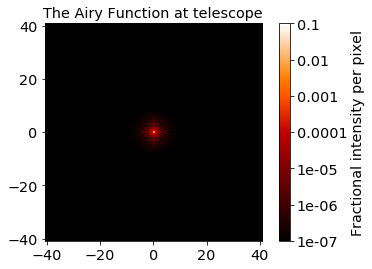

In [21]:
osys = poppy.OpticalSystem("first",oversample=oversample)
osys.add_pupil(poppy.CircularAperture(radius=telescope_radius/2.))# pupil radius in meters
osys.add_detector(pixelscale=pixel_fov, fov_arcsec=ccd_fov/10.)  # image plane coordinates in arcseconds
psf = osys.calc_psf(wavelength)                            # wavelength in microns
poppy.display_psf(psf, title='The Airy Function at telescope')

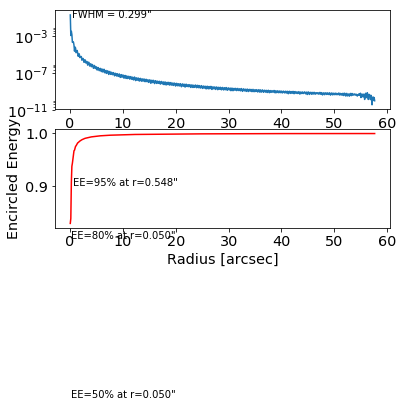

In [22]:
poppy.display_profiles(psf)

In [23]:
print("The PSF array shape is ", psf[0].data.shape)
print("The centroid is located at ({0:.3f}, {1:.3f})".format(*poppy.measure_centroid(psf)))

('The PSF array shape is ', (820, 820))
The centroid is located at (409.500, 409.500)


In [24]:
print("The FWHM is {0:.3f} arcsec at {1} microns ".format(poppy.measure_fwhm(psf), psf[0].header['WAVELEN']*1e6))

The FWHM is 0.302 arcsec at 0.6 microns 


## Airy on 4 mm diameter beam

In [16]:
beam_size=0.004 # beam size in meters

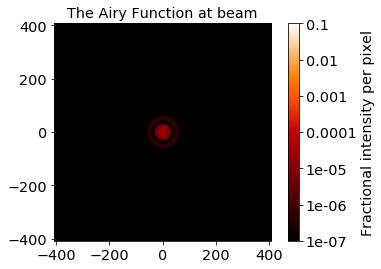

In [17]:
osys = poppy.OpticalSystem()
osys.add_pupil(poppy.CircularAperture(radius=beam_size/2.))# pupil radius in meters
osys.add_detector(pixelscale=pixel_fov, fov_arcsec=ccd_fov)  # image plane coordinates in arcseconds
psf = osys.calc_psf(wavelength)                            # wavelength in microns
poppy.display_psf(psf, title='The Airy Function at beam')

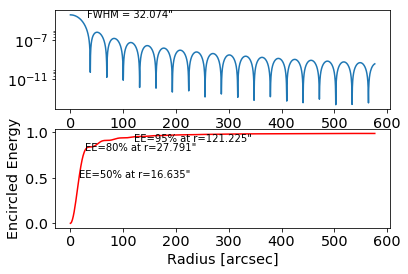

In [18]:
poppy.display_profiles(psf)

In [19]:
print("The PSF array shape is ", psf[0].data.shape)
print("The centroid is located at ({0:.3f}, {1:.3f})".format(*poppy.measure_centroid(psf)))

('The PSF array shape is ', (4096, 4096))
Algorithm terminated at max iterations without convergence.
The centroid is located at (2047.228, 2047.228)


In [20]:
print("The FWHM is {0:.3f} arcsec at {1} microns ".format(poppy.measure_fwhm(psf), psf[0].header['WAVELEN']*1e6))

The FWHM is 31.830 arcsec at 0.6 microns 


## Ronchi grating grid


In [44]:
myoptic = poppy.FITSOpticalElement(transmission='trans_ronchi200.fits', opd='opd_ronchi200.fits')

(<matplotlib.axes._subplots.AxesSubplot at 0x11612c1d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x116c84e10>)

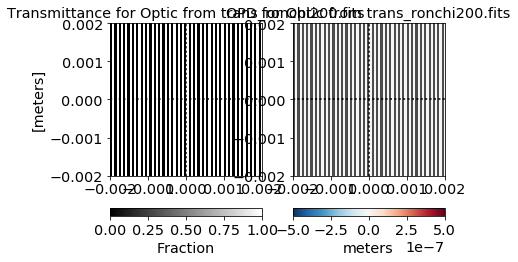

In [54]:
myoptic.display(what='both')    

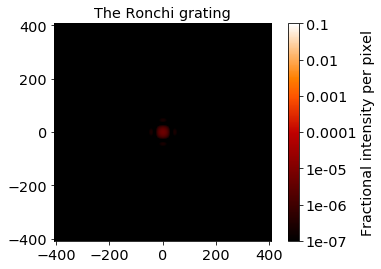

In [61]:
osys = poppy.OpticalSystem("Ronchi",oversample=oversample)
#osys.add_pupil(poppy.CircularAperture(radius=beam_size/2.))# pupil radius in meters
osys.add_pupil(myoptic) 
osys.add_detector(pixelscale=pixel_fov, fov_arcsec=ccd_fov)  # image plane coordinates in arcseconds
psf = osys.calc_psf(wavelength)                            # wavelength in microns
poppy.display_psf(psf, title='The Ronchi grating')

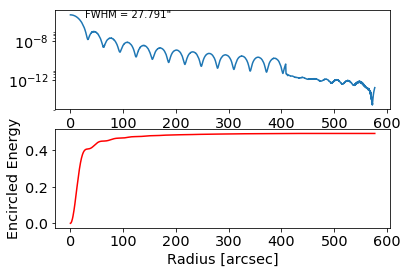

In [62]:
poppy.display_profiles(psf)

In [63]:
print("The PSF array shape is ", psf[0].data.shape)
print("The centroid is located at ({0:.3f}, {1:.3f})".format(*poppy.measure_centroid(psf)))

('The PSF array shape is ', (8192, 8192))
Algorithm terminated at max iterations without convergence.
The centroid is located at (4095.091, 4095.091)


In [64]:
print("The FWHM is {0:.3f} arcsec at {1} microns ".format(poppy.measure_fwhm(psf), psf[0].header['WAVELEN']*1e6))

The FWHM is 27.648 arcsec at 0.6 microns 
